# PCA MODEL

In [18]:
#####Links Used:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
#https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

##WHEN WE START TRAIN/TEST SPLIT REF.: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [20]:
initData = pd.read_csv("numeric_data_for_pca.csv")
initData.head()

,Unnamed: 0,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,youngsMod,ph,sec_Mn,sec_Mw,sec_polyDisp,sec_calcMass,sec_massRec
0,0,34.670,28.7790,0.051118,0.072340,2274.6,5.065,44.1,127.6,2.890,22.45,71.9
1,1,12.710,9.7289,0.030050,0.023396,1416.2,4.830,35.9,85.4,2.377,10.53,23.4
2,2,17.301,13.5850,0.034793,0.034683,2083.7,5.207,20.1,93.4,4.653,20.54,65.8
3,3,25.879,21.3200,0.044734,0.057662,2015.6,5.165,29.5,91.2,3.094,6.84,21.9
4,4,14.901,16.1320,0.047622,0.036076,1798.6,6.405,76.8,161.6,2.105,7.92,25.4


In [37]:
initData[initData.isnull().any(axis=1)].head()
initData.drop(columns = ['youngsMod', 'Unnamed: 0'])

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,ph,sec_Mn,sec_Mw,sec_polyDisp,sec_calcMass,sec_massRec
0,34.670,28.7790,0.051118,0.072340,5.065,44.1,127.6,2.890,22.45,71.9
1,12.710,9.7289,0.030050,0.023396,4.830,35.9,85.4,2.377,10.53,23.4
2,17.301,13.5850,0.034793,0.034683,5.207,20.1,93.4,4.653,20.54,65.8
3,25.879,21.3200,0.044734,0.057662,5.165,29.5,91.2,3.094,6.84,21.9
4,14.901,16.1320,0.047622,0.036076,6.405,76.8,161.6,2.105,7.92,25.4
...,...,...,...,...,...,...,...,...,...,...
952,26.905,16.8620,0.035132,0.047392,4.890,19.0,83.3,4.392,20.06,64.3
953,59.536,49.7810,0.065892,0.171850,8.465,22.0,170.2,7.743,17.02,54.5
954,27.976,29.3740,0.055006,0.064584,5.150,14.7,46.5,3.160,10.55,33.8
955,56.130,37.1630,0.060996,0.136090,7.440,27.0,83.1,3.072,12.52,40.1


In [38]:
initData = initData.dropna()
initData.shape

(930, 12)

In [39]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=3)

In [40]:
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])

In [49]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "sec_Mn"

X = initData.drop(target,1)
y = initData[target]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [50]:
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [51]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [52]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.26100299, 0.23301465, 0.15737431])

In [53]:
##Scree code:

screePipe = pipeline.fit_transform(initData)
scree_pca = PCA(n_components=5)

In [54]:
screeFitTransf=scree_pca.fit_transform(screePipe)

In [55]:
screeFitTransf

array([[ 0.78847826, -0.3908887 ,  0.57268511,  0.03006658,  0.0666305 ],
       [-0.70923997, -0.21841604,  0.52464622,  0.15094704,  0.22516676],
       [-0.01108043, -0.79986645,  0.13518292,  0.03926919,  0.51828459],
       ...,
       [-0.03265672,  0.5708505 , -0.59115211,  0.08638264, -0.16424961],
       [ 0.59192756,  0.56401205, -0.12521619,  0.50699736, -0.11993533],
       [ 0.52494874, -0.18274865, -0.63789325,  0.53589938, -0.04990995]])

In [56]:
scree_df = pd.DataFrame(data = screeFitTransf, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [58]:
scree_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,0.788478,-0.390889,0.572685,0.030067,0.066630
1,-0.709240,-0.218416,0.524646,0.150947,0.225167
2,-0.011080,-0.799866,0.135183,0.039269,0.518285
3,-0.434865,0.287587,0.603175,0.139992,0.345888
4,-0.238320,0.242569,0.789388,0.252342,0.280160


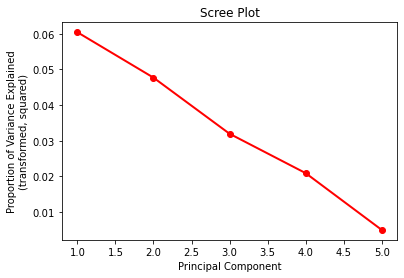

In [59]:
###Scree Plot

import matplotlib.pyplot as plt

scree_PC_Values = np.arange(scree_pca.n_components_) + 1
plt.plot(scree_PC_Values, np.square(scree_pca.explained_variance_ratio_), 'ro-', linewidth=2)
###We transformed the scree plot by squaring the variance explained to make the "ideal" PC more apparent
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained\n(transformed, squared)')
plt.show()